<a href="https://colab.research.google.com/github/jhulizipa/SIP---Data-Science/blob/main/CIP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Celsius a fahrenheit
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import pandas as pd
import plotly.express as px

path_file="/content/drive/MyDrive/CIP/housingData.csv"
df=pd.read_csv(path_file, sep=",", header=0, on_bad_lines='skip')
#df=pd.read_csv(path_file, sep=",", header0)
#df.head(1)
#print(df.head(20))

# df.tail(5) #Retorna las ultimas n filas
# df.sample(5) #Retorna n filas al azar
# df.shape #Devuelve el número de filas y columnas
# df.size #Devuelve el total de datos
df.info() #Muestra valores no nulos
# df.describe() #Genera estadisticas descriptivas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

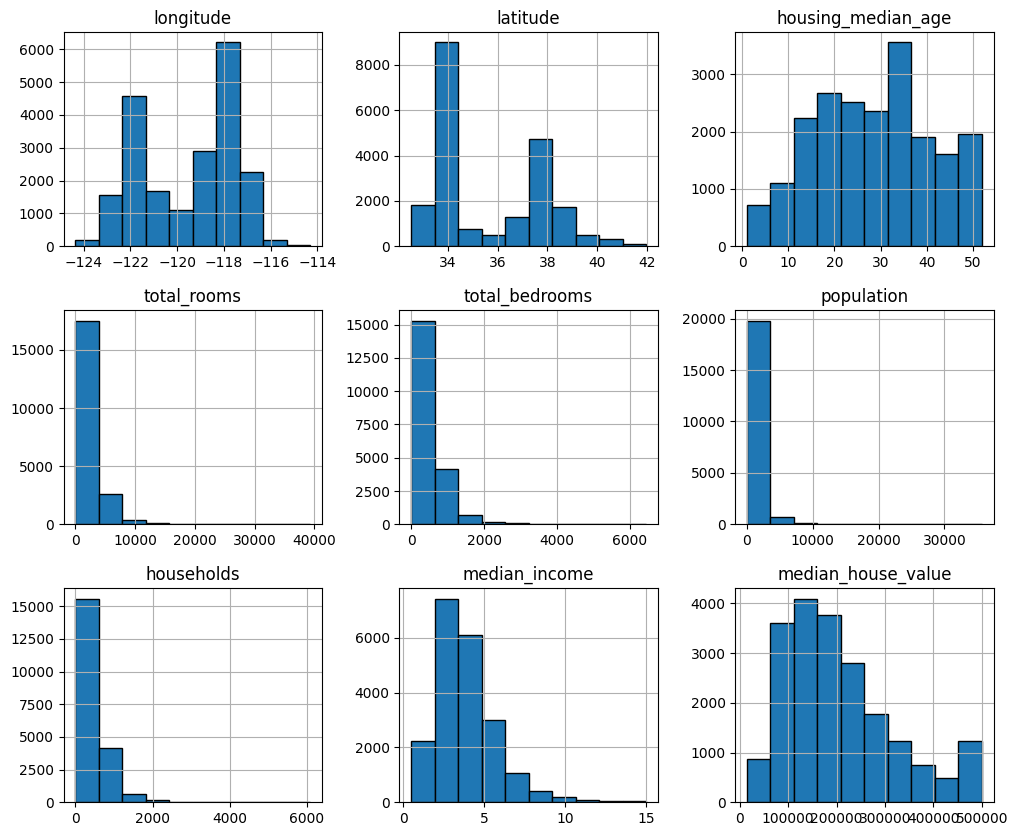

In [3]:

#Comandos clase 2


#Histograma de una variable en especifico

#df.hist("nombre_variable")
df.hist(figsize=(12,10), edgecolor="black", bins=10)



array([[<Axes: title={'center': 'population'}>]], dtype=object)

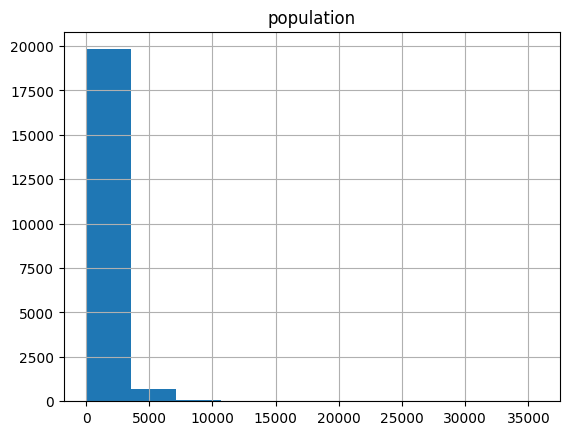

In [4]:
#df.hist("median_house_value")
df.hist("population")

<Axes: xlabel='latitude', ylabel='longitude'>

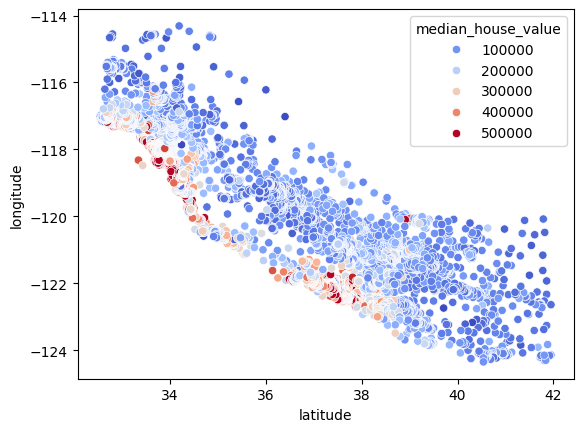

In [5]:
import seaborn as sb
# sb.scatterplot(x="celsius", y="fahrenheit", data=datos)
sb.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

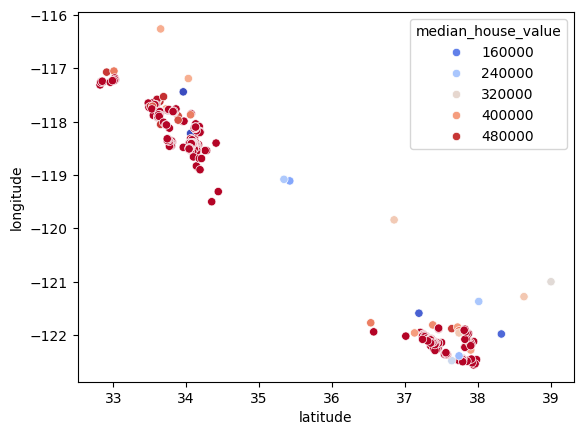

In [6]:
sb.scatterplot(x="latitude", y="longitude", data=df[(df.median_income > 10)], hue="median_house_value", palette="coolwarm")

**Limpiar datos**

In [7]:
datos2=df.dropna()
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
#datos2.describe("ocean_proximity")
#print(datos2['ocean_proximity'].unique())
datos2["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [9]:
#Dummies / One-Hot Encoding
dummies_ocean = pd.get_dummies(datos2["ocean_proximity"], dtype=int)
#dummies_ocean

datos2 = datos2.join(dummies_ocean)
datos2.head()

datos2 = datos2.drop(["ocean_proximity"], axis=1)
datos2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


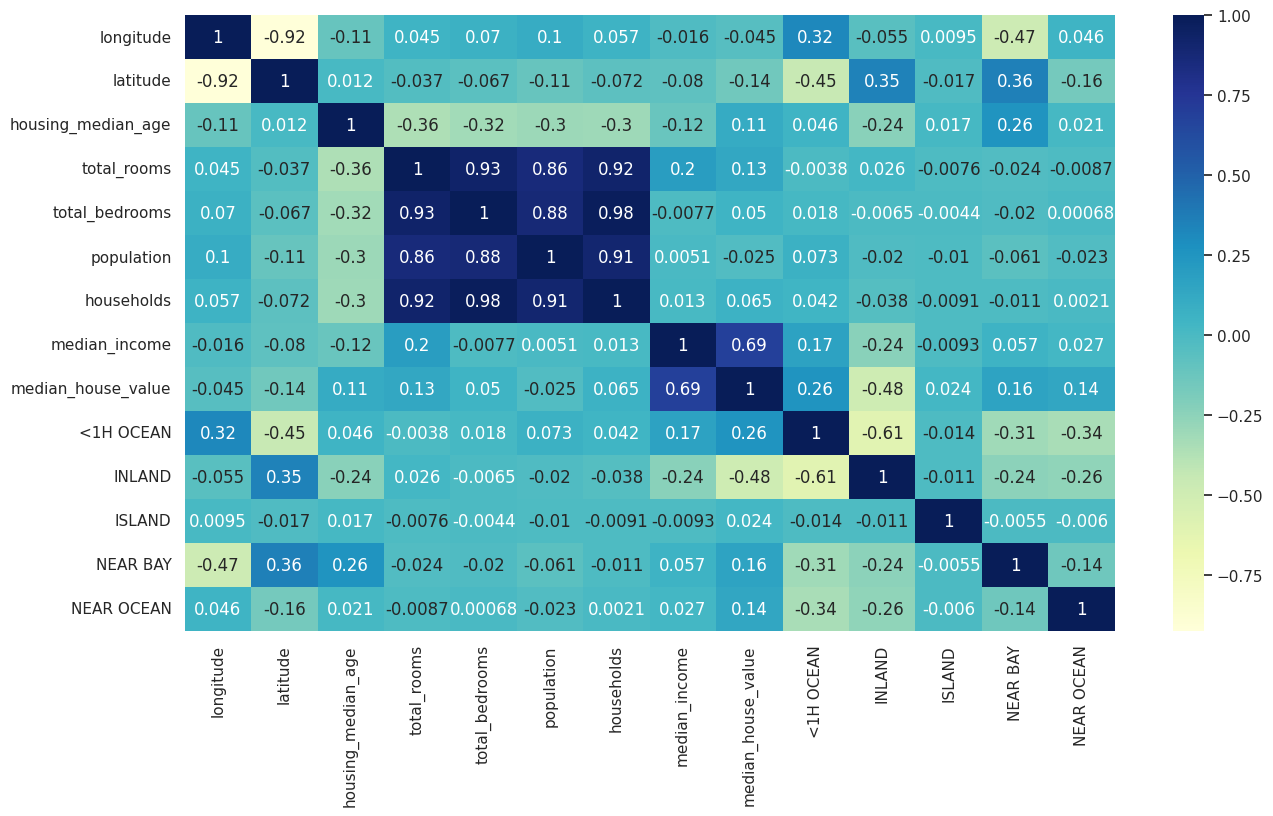

In [10]:
datos2.corr()
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos2.corr(), annot=True, cmap="YlGnBu")
datos2.corr()["median_house_value"].sort_values(ascending=False)

**Regresion Lineal**

In [11]:
x = datos2.drop(["median_house_value"], axis=1)
y = datos2["median_house_value"]

from sklearn.model_selection import train_test_split
x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(x, y, test_size=.2)


In [12]:
y_prueba.shape
y_entrena.shape

(16346,)

In [13]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(x_entrena, y_entrena)

LinearRegression()

In [14]:
prediccion = modelo.predict(x_prueba)
print(prediccion)

[267935.41988246 241101.70196324  15271.3088498  ... 325533.701535
 112138.94347784 145232.96682058]


In [15]:
comparativa = {"Prediccion": prediccion, "Valor Real": y_prueba}
pd.DataFrame(comparativa)


,Prediccion,Valor Real
16796,267935.419882,278400.0
20278,241101.701963,218500.0
11852,15271.308850,100000.0
15331,195674.830464,162400.0
13466,64386.059700,105200.0
...,...,...
19675,112129.872323,110700.0
11001,422163.385019,500001.0
18527,325533.701535,238600.0
12310,112138.943478,128100.0


In [16]:
print(modelo.score(x_entrena, y_entrena))
print(modelo.score(x_prueba, y_prueba))

0.6472347445070649
0.6430966348563008


In [17]:
#

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_prueba, prediccion)
print(mse)

4796156530.224838


**Raiz cuadrada del error medio (RMSE)**

In [18]:
import numpy as np

rmse = np.sqrt(mse)
rmse

69254.28889408105

In [19]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-7.24502785e+09, -3.51492494e+09, -7.75863533e+09, -3.93664635e+09,
       -6.55869575e+09, -4.87535622e+09, -2.74473835e+09, -8.32708418e+09,
       -6.04058885e+09, -2.86360587e+09])

In [20]:
rmse_scores=np.sqrt(-scores)
rmse_scores

array([85117.72934312, 59286.80239565, 88083.11604239, 62742.69957837,
       80985.7749551 , 69823.75109584, 52390.25053211, 91252.8584722 ,
       77721.22520377, 53512.67015962])

In [21]:
def mostrar_scores(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de MSE en cada fold: [85117.72934312 59286.80239565 88083.11604239 62742.69957837
 80985.7749551  69823.75109584 52390.25053211 91252.8584722
 77721.22520377 53512.67015962]
Promedio de MSE: 72091.68777781757
Desviación estándar de MSE: 13759.321238818411


**Arbol de desicion**

In [22]:
from sklearn.tree import DecisionTreeRegressor
modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(x_entrena, y_entrena)


DecisionTreeRegressor(random_state=42)

In [23]:
scores = cross_val_score(modelDecisionTree, x, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-1.93202185e+10, -5.49628487e+09, -1.13285119e+10, -5.80476223e+09,
       -7.18204918e+09, -6.88589657e+09, -4.51562567e+09, -1.20837905e+10,
       -1.03616807e+10, -5.56581780e+09])

In [24]:
rmse_scores=np.sqrt(-scores)
rmse_scores

array([138997.18866176,  74136.93321853, 106435.48211063,  76188.99019959,
        84746.97148977,  82981.30256267,  67198.40525445, 109926.29592532,
       101792.3412638 ,  74604.40874788])

In [25]:
def mostrar_scores(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de MSE en cada fold: [138997.18866176  74136.93321853 106435.48211063  76188.99019959
  84746.97148977  82981.30256267  67198.40525445 109926.29592532
 101792.3412638   74604.40874788]
Promedio de MSE: 91700.83194344032
Desviación estándar de MSE: 21105.004412133527


**Random Forest**

In [26]:
from sklearn.ensemble import RandomForestRegressor

modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRandomF.fit(x_entrena, y_entrena)

RandomForestRegressor(random_state=42)

In [27]:
scores = cross_val_score(modeloRandomF, x, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-1.14443007e+10, -2.39251726e+09, -4.95251413e+09, -3.61981068e+09,
       -3.89158242e+09, -4.46391867e+09, -2.37197815e+09, -7.54996229e+09,
       -6.55524233e+09, -2.98781291e+09])

In [28]:
rmse_scores=np.sqrt(-scores)
rmse_scores

array([106978.03831001,  48913.36488785,  70374.10130739,  60164.86252583,
        62382.54900055,  66812.56370299,  48702.95831385,  86890.51896028,
        80964.45104981,  54660.89012302])

In [29]:
def mostrar_scores(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de MSE en cada fold: [106978.03831001  48913.36488785  70374.10130739  60164.86252583
  62382.54900055  66812.56370299  48702.95831385  86890.51896028
  80964.45104981  54660.89012302]
Promedio de MSE: 68684.42981815965
Desviación estándar de MSE: 17476.07087805363


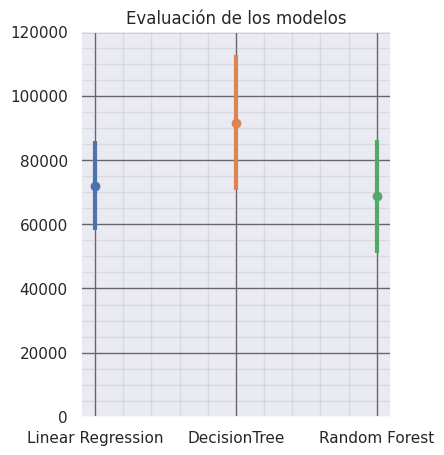

In [54]:
# Datos de evaluación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean = [72091, 91700, 68684]
list_sd = [13759, 21105, 17476]

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
for i in range(3):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [32]:
#Scaler escalamiento

datos2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_entrena_escalado = scaler.fit_transform(x_entrena)
x_prueba_escalado = scaler.transform(x_prueba)

pd.DataFrame(x_entrena)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15947,-122.43,37.72,52.0,3351.0,719.0,2101.0,706.0,3.0107,0,0,0,1,0
13101,-121.27,38.44,19.0,2780.0,414.0,1320.0,404.0,5.8831,0,1,0,0,0
13809,-117.01,34.90,34.0,2194.0,519.0,1326.0,515.0,2.1056,0,1,0,0,0
8730,-118.31,33.84,52.0,1819.0,464.0,1068.0,424.0,3.6250,1,0,0,0,0
9538,-120.71,37.39,11.0,1479.0,341.0,1476.0,327.0,3.2721,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7328,-118.17,33.97,33.0,2410.0,641.0,2106.0,593.0,2.2422,1,0,0,0,0
4596,-118.28,34.05,41.0,1788.0,774.0,2931.0,702.0,1.4413,1,0,0,0,0
6992,-118.02,33.95,38.0,2139.0,426.0,1138.0,412.0,4.2917,1,0,0,0,0
14633,-117.20,32.79,16.0,2079.0,394.0,746.0,383.0,5.0958,0,0,0,0,1


In [34]:
from sklearn.model_selection import train_test_split
x_entrena_escalado, x_prueba_escalado, y_entrena, y_prueba = train_test_split(x, y, test_size=.2)


In [35]:
from sklearn.linear_model import LinearRegression

modelo4=LinearRegression()
modelo4.fit(x_entrena_escalado, y_entrena)

LinearRegression()

In [36]:
prediccion = modelo4.predict(x_prueba_escalado)
print(prediccion)

[206686.38820586 176037.37874385 233795.4106616  ...  96620.15428841
 223269.93411054 414059.41324008]


In [37]:
print(modelo4.score(x_entrena_escalado, y_entrena))
print(modelo4.score(x_prueba_escalado, y_prueba))

0.6478334458729882
0.6392965157994066


In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse=mean_squared_error(y_prueba, prediccion)
print(mse)

4911880847.765722


In [39]:
import numpy as np
rmse=np.sqrt(mse)
rmse

70084.81181943575

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo4, x, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-7.24502785e+09, -3.51492494e+09, -7.75863533e+09, -3.93664635e+09,
       -6.55869575e+09, -4.87535622e+09, -2.74473835e+09, -8.32708418e+09,
       -6.04058885e+09, -2.86360587e+09])

In [41]:
rmse_scores=np.sqrt(-scores)
rmse_scores

array([85117.72934312, 59286.80239565, 88083.11604239, 62742.69957837,
       80985.7749551 , 69823.75109584, 52390.25053211, 91252.8584722 ,
       77721.22520377, 53512.67015962])

In [42]:
def mostrar_scores2(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de MSE en cada fold: [85117.72934312 59286.80239565 88083.11604239 62742.69957837
 80985.7749551  69823.75109584 52390.25053211 91252.8584722
 77721.22520377 53512.67015962]
Promedio de MSE: 72091.68777781757
Desviación estándar de MSE: 13759.321238818411


**Arbol de desicion, datos refinados**

In [43]:
from sklearn.tree import DecisionTreeRegressor
modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(x_entrena_escalado, y_entrena)

DecisionTreeRegressor(random_state=42)

In [44]:
scores = cross_val_score(modelDecisionTree, x, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-1.93202185e+10, -5.49628487e+09, -1.13285119e+10, -5.80476223e+09,
       -7.18204918e+09, -6.88589657e+09, -4.51562567e+09, -1.20837905e+10,
       -1.03616807e+10, -5.56581780e+09])

In [45]:
rmse_scores=np.sqrt(-scores)
rmse_scores

array([138997.18866176,  74136.93321853, 106435.48211063,  76188.99019959,
        84746.97148977,  82981.30256267,  67198.40525445, 109926.29592532,
       101792.3412638 ,  74604.40874788])

In [52]:
print(modelDecisionTree.score(x_entrena_escalado, y_entrena))
print(modelDecisionTree.score(x_prueba_escalado, y_prueba))

1.0
0.636150381497878


In [46]:
def mostrar_scores(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de MSE en cada fold: [138997.18866176  74136.93321853 106435.48211063  76188.99019959
  84746.97148977  82981.30256267  67198.40525445 109926.29592532
 101792.3412638   74604.40874788]
Promedio de MSE: 91700.83194344032
Desviación estándar de MSE: 21105.004412133527


**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor
modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRandomF.fit(x_entrena_escalado, y_entrena)

RandomForestRegressor(random_state=42)

In [48]:
scores = cross_val_score(modeloRandomF, x, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-1.14443007e+10, -2.39251726e+09, -4.95251413e+09, -3.61981068e+09,
       -3.89158242e+09, -4.46391867e+09, -2.37197815e+09, -7.54996229e+09,
       -6.55524233e+09, -2.98781291e+09])

In [49]:
rmse_scores=np.sqrt(-scores)
rmse_scores

array([106978.03831001,  48913.36488785,  70374.10130739,  60164.86252583,
        62382.54900055,  66812.56370299,  48702.95831385,  86890.51896028,
        80964.45104981,  54660.89012302])

In [53]:
print(modeloRandomF.score(x_entrena_escalado, y_entrena))
print(modeloRandomF.score(x_prueba_escalado, y_prueba))

0.9751857725411972
0.8137819211340855


In [50]:
def mostrar_scores2(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores2(rmse_scores)

Puntajes de MSE en cada fold: [106978.03831001  48913.36488785  70374.10130739  60164.86252583
  62382.54900055  66812.56370299  48702.95831385  86890.51896028
  80964.45104981  54660.89012302]
Promedio de MSE: 68684.42981815965
Desviación estándar de MSE: 17476.07087805363


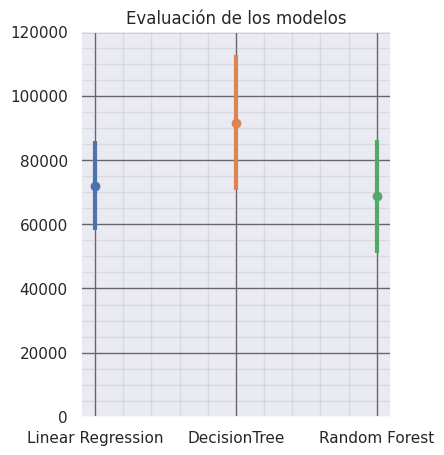

In [55]:
# Datos de evaluación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean = [72091, 91700, 68684]
list_sd = [13759, 21105, 17476]

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
for i in range(3):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

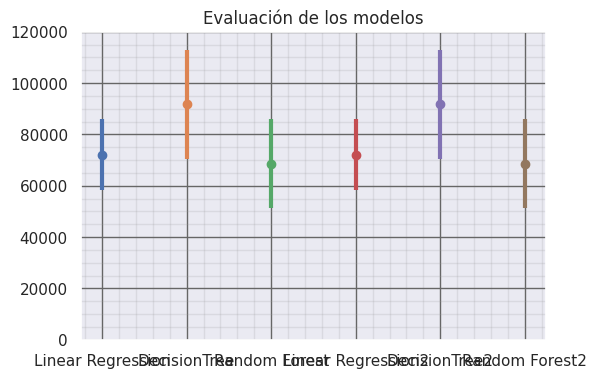

In [56]:
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest', 'Linear Regression2', 'DecisionTree2', 'Random Forest2']
list_mean = [72091, 91700, 68684, 72091, 91700, 68684]
list_sd = [13759, 21105, 17476, 13759, 21105, 17476]

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
for i in range(6):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2, 3, 4 ,5], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)